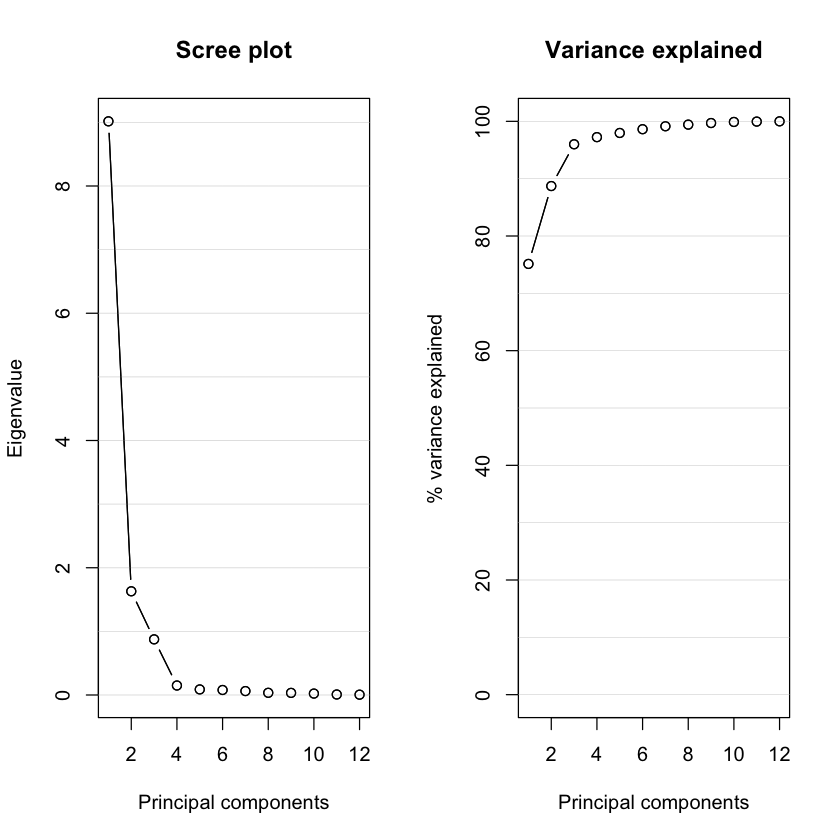

In [6]:
# Slide 25:

lambda<-c(9.01626784,1.62996970,0.87459018,0.14911589,
          0.087459018,0.07875169,0.06162583,0.03445767,
          0.03319704,0.02235388,0.00796802,0.00516771)

par(mfrow=c(1,2))
plot(1:12,lambda,type="b",xlab='Principal components',ylab='Eigenvalue',
     main="Scree plot")
for(i in 0:9){
  lines(0:14,rep(i,15),col="lightgrey",lwd=0.5)
  }
lines(1:12,lambda,type="b")
plot(1:12,100*cumsum(lambda)/sum(lambda),type="b",
     xlab='Principal components',ylab='% variance explained',
     main="Variance explained",ylim=c(0,100))
for(i in 0:10){
  lines(0:14,rep(10*i,15),col="lightgrey",lwd=0.5)
  }
lines(1:12,100*cumsum(lambda)/sum(lambda),type="b")
par(mfrow=c(1,1))

,Name,Points,Hurdles,High.Jump,Shot,Run200,Longjump,Javelin,Run800
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,"Joyner_Kersee,(USA)",7291,12.69,1.86,15.80,22.56,7.27,45.66,128.51
2,"John,(GDR)",6897,12.85,1.80,16.23,23.65,6.71,42.56,126.14
3,"Behmer,(GDR)",6858,13.20,1.83,14.20,23.10,6.68,44.54,124.20
4,"Choubenkova,(URS)",6540,13.51,1.74,14.76,23.93,6.32,47.46,127.90
5,"Sablovskaite,(URS)",6456,13.61,1.80,15.23,23.92,6.25,42.78,132.24
6,"Schulz,(GDR)",6411,13.75,1.83,13.50,24.65,6.33,42.82,125.79


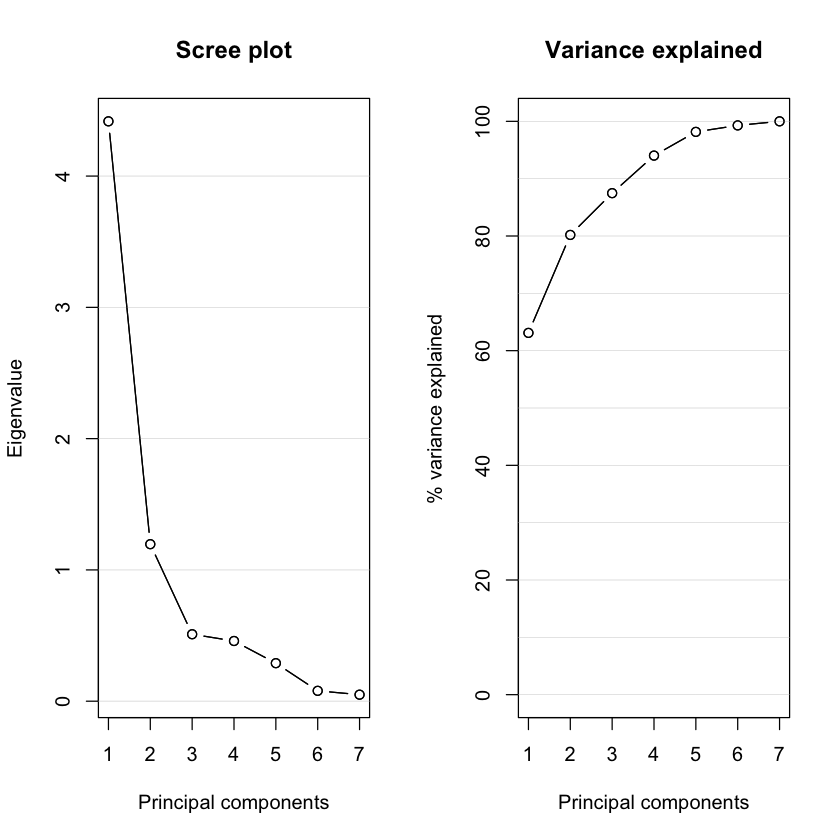

In [7]:
# Slide 26:

heptathlon<-read.csv2("../Data/heptathlon - copy.csv")

head(heptathlon)
X<-heptathlon[,-(1:2)]
Sigma<-cor(X)

lambda<-eigen(Sigma)$values

par(mfrow=c(1,2))
plot(1:7,lambda,type="b",xlab='Principal components',ylab='Eigenvalue',
     main="Scree plot")
for(i in 0:4){
  lines(0:14,rep(i,15),col="lightgrey",lwd=0.5)
  }
lines(1:7,lambda,type="b")
plot(1:7,100*cumsum(lambda)/sum(lambda),type="b",
     xlab='Principal components',ylab='% variance explained',
     main="Variance explained",ylim=c(0,100))
for(i in 0:10){
  lines(0:14,rep(10*i,15),col="lightgrey",lwd=0.5)
  }
lines(1:7,100*cumsum(lambda)/sum(lambda),type="b")
par(mfrow=c(1,1))

In [8]:
#Slide 28:

install.packages("remotes")  # harmless if already present
remotes::install_github(
  "rwehrens/ChemometricsWithR",
  dependencies = TRUE,
  upgrade = "never",
  build_vignettes = FALSE
)

# install.packages("remotes")
library(remotes)
# install_github("rwehrens/ChemometricsWithR")

library(ChemometricsWithR)
boxdata<-read.csv2("../Data/BoxData.csv")
head(boxdata)
boxdata2<-boxdata
names(boxdata2)<-paste("X",1:7,sep="")

boxdata.PC<- PCA(scale(boxdata2))



loadingplot(boxdata.PC,show.names = TRUE,xlim=c(-1,1),ylim=c(-1,1),
            main="Loadings plot, PC1 and PC2")
lines(cos((0:100)*2*pi/100),sin((0:100)*2*pi/100),col="lightgrey")

loadingplot(boxdata.PC,pc=c(1,3),show.names = TRUE,xlim=c(-1,1),ylim=c(-1,1),
            main="Loadings plot, PC1 and PC3")
lines(cos((0:100)*2*pi/100),sin((0:100)*2*pi/100),col="lightgrey")

loadingplot(boxdata.PC,pc=c(2,3),show.names = TRUE,xlim=c(-1,1),ylim=c(-1,1),
            main="Loadings plot, PC2 and PC3")
lines(cos((0:100)*2*pi/100),sin((0:100)*2*pi/100),col="lightgrey")

boxdata.PC$loadings[,1:3]

Installing package into ‘/Users/dittegilsfeldt/Library/R/4.4.3/library’
(as ‘lib’ is unspecified)

Using GitHub PAT from the git credential store.


Installing 24 packages: modeltools, S7, RcppArmadillo, kernlab, diptest, prabclus, flexmix, Iso, nnls, corpcor, ISwR, RcppDE, fpc, ALS, rrcov, subselect, ada, sfsmisc, rda, signal, dtw, ptw, fastICA, kohonen

Installing packages into ‘/Users/dittegilsfeldt/Library/R/4.4.3/library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘RcppArmadillo’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘kohonen’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘RcppDE’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘ptw’ had non-zero exit status”


: 

In [ ]:
# Slide 29:

barplot(t(boxdata.PC$loadings), beside=T,col=rainbow(7),ylim=c(-1,1),
         names.arg=names(boxdata),ylab="loadings")
legend("topright",paste("PC",1:7),col=rainbow(7),pch=15,ncol=3,bty="n")
box()

In [ ]:
# Slide 31:

library(chemometrics)
boxdata.PCA<- princomp(boxdata, cor = TRUE)
res<-pcaDiagplot(boxdata, boxdata.PCA, a=2,plot=F)

plot(res$SDist, res$ODist, type="n",xlab="Score Distance, 2PC",
     ylab="Orthogonal Distance, 2PC")
text(res$SDist, res$ODist, labels=as.character(1:25))

In [ ]:
 Slide 32
boxdata[c(4,7),]
summary(boxdata)

In [ ]:
# Slide 33

boxdata.PC2<- PCA(scale(boxdata2[-c(4,7),]))

barplot(t(boxdata.PC2$loadings), beside=T,col=rainbow(7),ylim=c(-1,1),
         names.arg=names(boxdata),ylab="loadings")
legend("topright",paste("PC",1:7),col=rainbow(7),pch=15,ncol=3,bty="n")
box()

In [ ]:
# Slide 34:


par(mfrow=c(2,1))
layout.matrix<-matrix(c(1,1,2,2,3),ncol=1)
layout(layout.matrix)

barplot(t(boxdata.PC$loadings), beside=T,col=rainbow(7),ylim=c(-1,1),
         names.arg=names(boxdata),ylab="loadings",main ="Original")
box()

barplot(t(boxdata.PC2$loadings), beside=T,col=rainbow(7),ylim=c(-1,1),
         names.arg=names(boxdata),ylab="loadings",
         main ="Leaving out box 4 and 7")
box()

plot(1:10,1:10,pch="",xlab='',ylab='',axes=F)
legend(1,15,paste("PC",1:7),col=rainbow(7),pch=15,ncol=7,bty="n",
cex=1.2,pt.cex=2,x.intersp=1.5,xjust=-0.2)

par(mfrow=c(1,1))

In [ ]:
# Slide 36:


boxdata.PCA2<- princomp(boxdata[-c(4,7),], cor = TRUE)
res<-pcaDiagplot(boxdata[-c(4,7),], boxdata.PCA2, a=2,plot=F)


plot(res$SDist, res$ODist, type="n",xlab="Score Distance, 2PC",
     ylab="Orthogonal Distance, 2PC")
text(res$SDist, res$ODist, labels=as.character(1:25)[-c(4,7)])

In [ ]:
# Slide 38:

stanford<-read.csv2("../Data/stanford.csv")

library(car)
scatterplotMatrix(stanford,regLine=F,smooth=F,
  ellipse=list(levels=0.9, robust=TRUE, fill=F),
  diagonal=list(method="histogram", breaks="FD"))

# Slide 39:

par(mfrow=c(6,6))
for(i in 1:32){hist(stanford[,i],main=names(stanford)[i],xlab='Score',
    xlim=c(1,9))}
par(mfrow=c(1,1))

In [ ]:
# Slide 40:

stanford.PC<- PCA(scale(stanford))



lambda<-eigen(cor(stanford))$values

data.frame(Eigenvalue=lambda,Proportion=round(lambda/32,digits=4),
           Cumulative=round(cumsum(lambda)/32,digits=4))[1:7,]

par(mfrow=c(1,2))
plot(1:32,lambda,type="b",xlab='Principal components',ylab='Eigenvalue',
     main="Scree plot")
for(i in 0:7){
  lines(0:35,rep(i,36),col="lightgrey",lwd=0.5)
  }
lines(1:32,lambda,type="b")
plot(1:32,100*cumsum(lambda)/sum(lambda),type="b",
     xlab='Principal components',ylab='% variance explained',
     main="Variance explained",ylim=c(0,100))
for(i in 0:10){
  lines(0:35,rep(10*i,36),col="lightgrey",lwd=0.5)
  }
lines(1:32,100*cumsum(lambda)/sum(lambda),type="b")
par(mfrow=c(1,1))

eigen(cor(stanford))$vectors[,1:6]

In [ ]:
# Slide 41:

layout.matrix<-matrix(c(1,1,2,2,3),ncol=1)
layout(layout.matrix)
barplot(t(stanford.PC$loadings[1:16,1:3]), beside=T,col=rainbow(3),ylim=c(-0.4,0.4),
         names.arg=names(stanford)[1:16],ylab="loadings",main ="")
#box()

barplot(t(stanford.PC$loadings[17:32,1:3]), beside=T,col=rainbow(3),ylim=c(-0.4,0.4),
         names.arg=names(stanford)[17:32],ylab="loadings",
         main ="")
#box()

plot(1:10,1:10,pch="",xlab='',ylab='',axes=F)
legend(1,15,paste("PC",1:3),col=rainbow(3),pch=15,ncol=7,bty="n",
cex=1.2,pt.cex=2,x.intersp=1.5,xjust=-0.45)



eigen(cor(stanford))$values
head(eigen(cor(stanford))$vectors[,1:6])

In [ ]:
# Slide 44:

library(psych)

#### Factor analysis 5 Factors #### 
fa5 <- principal(cor(stanford),nfactors = 5,rotate = "none") 
fa51 <- fa5$loadings[,1:5] 
fa5com <- fa5$communality 

ERROR: Error in library(psych): there is no package called ‘psych’


In [ ]:
# Slide 45:

# Factor patterns:
fa51

# variance explained:
colSums(fa51[,1:5]^2)

# total communality
sum(rowSums(fa51[,1:5]^2))
# or: sum(fa5com)

# single communalities:
fa5com

In [ ]:
#Slide 46:

stanford.PCA<- princomp(stanford, cor = TRUE)
res<-pcaDiagplot(stanford, stanford.PCA, a=5,plot=F)


plot(res$SDist, res$ODist, type="n",xlab="Score Distance, 5PC",
     ylab="Orthogonal Distance, 5PC")
text(res$SDist, res$ODist, labels=as.character(1:240))

In [ ]:
# Slide 57:

#### Factor analysis 5 Factors #### 
fa5 <- principal(cor(stanford),nfactors = 5,rotate = "none") 
fa5l <- fa5$loadings[,1:5] 
fa5com <- fa5$communality 
#rotated: 
rfa5 <- principal(cor(stanford),nfactors = 5,rotate = "varimax") 
rfa5l <- rfa5$loadings[,1:5] 
rfa5com <- rfa5$communality 
#Factors 
Factors5 <- data.frame("FA" = fa5l,"Rot FA" = rfa5l) 

In [ ]:
# Slide 58:

# Plots for factor analysis with 5 factors, without invoking a package: 
par(mfrow = c(3,2)) 
circle = seq(-3.2,3.2,by=0.1) 
# Different combinations of plots 
ij = matrix(c(1,1,2,2,3,3),ncol=2) 
Names = names(stanford)
for (i in 1:3){ 
	l = ij[i,1] 
	k = ij[i,2] 
	#Plot for the Factors 
	plot(0,0,xlim = c(-1.2,1.2),ylim = c(-1.2,1.2),xlab = paste0("Factor ",l), ylab = paste0("Factor ",k),main = "Initial Factor Pattern") 
	points(1*cos(circle),1*sin(circle),type='l') 	
      arrows(c(rep(0,7)),c(rep(0,7)),fa5l[,l],fa5l[,k],length = 0.1,col="blue") 	
      text(fa5l[,l],fa5l[,k]+0.1,Names,cex = 0.7) 
	grid() 
	#Plot for rotated Factors 
	plot(0,0,xlim = c(-1.2,1.2),ylim = c(-1.2,1.2),xlab = paste0("Factor ",l), ylab = paste0("Factor ",k),main = "Rotated Factor Pattern") 
	points(1*cos(circle),1*sin(circle),type='l') 	
      arrows(c(rep(0,7)),c(rep(0,7)),rfa5l[,l],rfa5l[,k],length = 0.1,col="blue")
 	text(rfa5l[,l],rfa5l[,k]+0.1,Names,cex = 0.7) 
	grid() 
} 